# Superposition and the Infinite Potential Well

## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Define a Few Constants

In [2]:
# width of the well in a.u. (i.e. 1 bohr radius)
L = 1 



# Gaussian pulse
sigma = L / 20 # standard deviation (defines the width of the gaussian curve)
mu = L / 5 # expected position (defines the location of the centre of the gaussian)



# length of array (number of times we sample each function)
nmax = 300 

# step in x values
step = L / nmax 

## Gaussian Function

In [3]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# an empty array of length nmax
g = np.empty(nmax) 

# filling array with values from our gaussian
for x in np.arange(0, nmax): 
    g[x] = np.sqrt(gaussian(x * step, mu, sigma))

## Eigenfunctions of potential well

In [19]:
def psi(n, x, L):
    return np.sqrt(2 / L) * np.sin(np.pi * n * x / L)


# an array of 4 eigenfunctions
num = 4
eigs = np.empty((num, nmax))

for i in range(0, num): 
    for x in np.arange(0, nmax, 1):
        eigs[i, x] = psi(i + 1, x * step, L) 

## Plotting the eigenfunctions

<IPython.core.display.Javascript object>


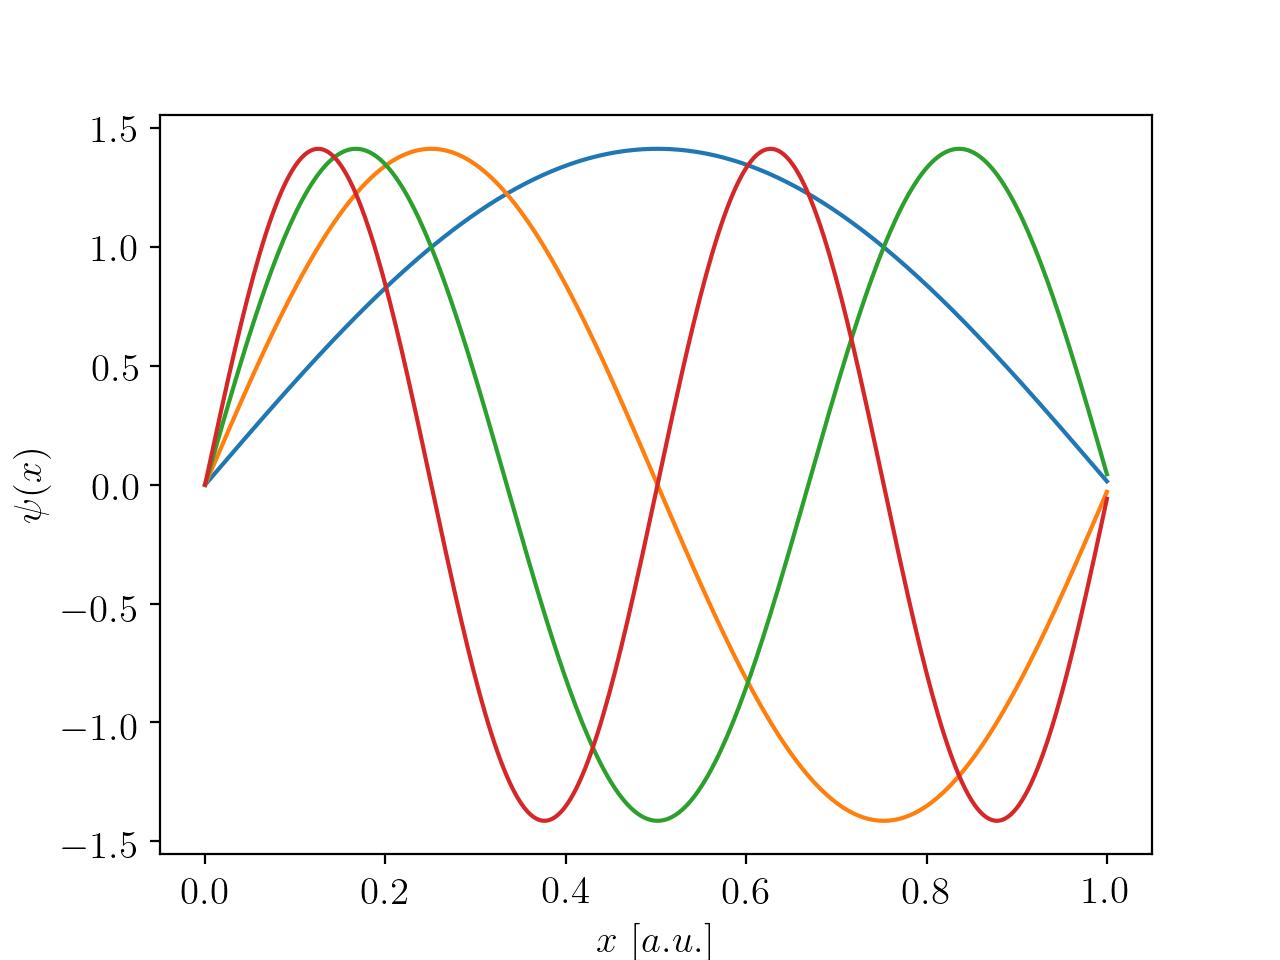

Text(0, 0.5, '$\\psi(x)$')

In [20]:
# plotting the n eigenfunctions
xs = np.linspace(0, 1, nmax)

for i in range(0, num):
    plt.plot(xs, eigs[i])
    
plt.rcParams.update({'font.size': 14})
plt.rc('text', usetex=True) 
plt.xlabel(r'$x \ [a.u. ]$')
plt.ylabel(r'$\psi(x)$')

## Calculating our coefficients

Text(0, 0.5, '$c_n$')

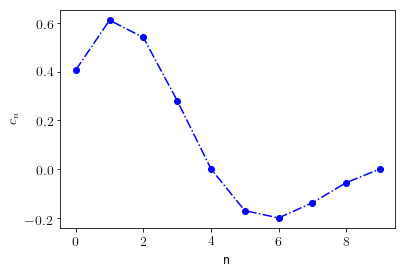

In [6]:
# calculating the weighting of each eigenfunction
cn = np.zeros(num)

for i in range(0, num):
    cn[i] = step * sum(g * eigs[i])
    
plt.plot(cn, 'bo')
plt.plot(cn, 'b-.')
plt.rcParams.update({'font.size': 14})
plt.xlabel(r'n')
plt.ylabel(r'$c_n$')

# Comparison of superposition state and the gaussian

<IPython.core.display.Javascript object>


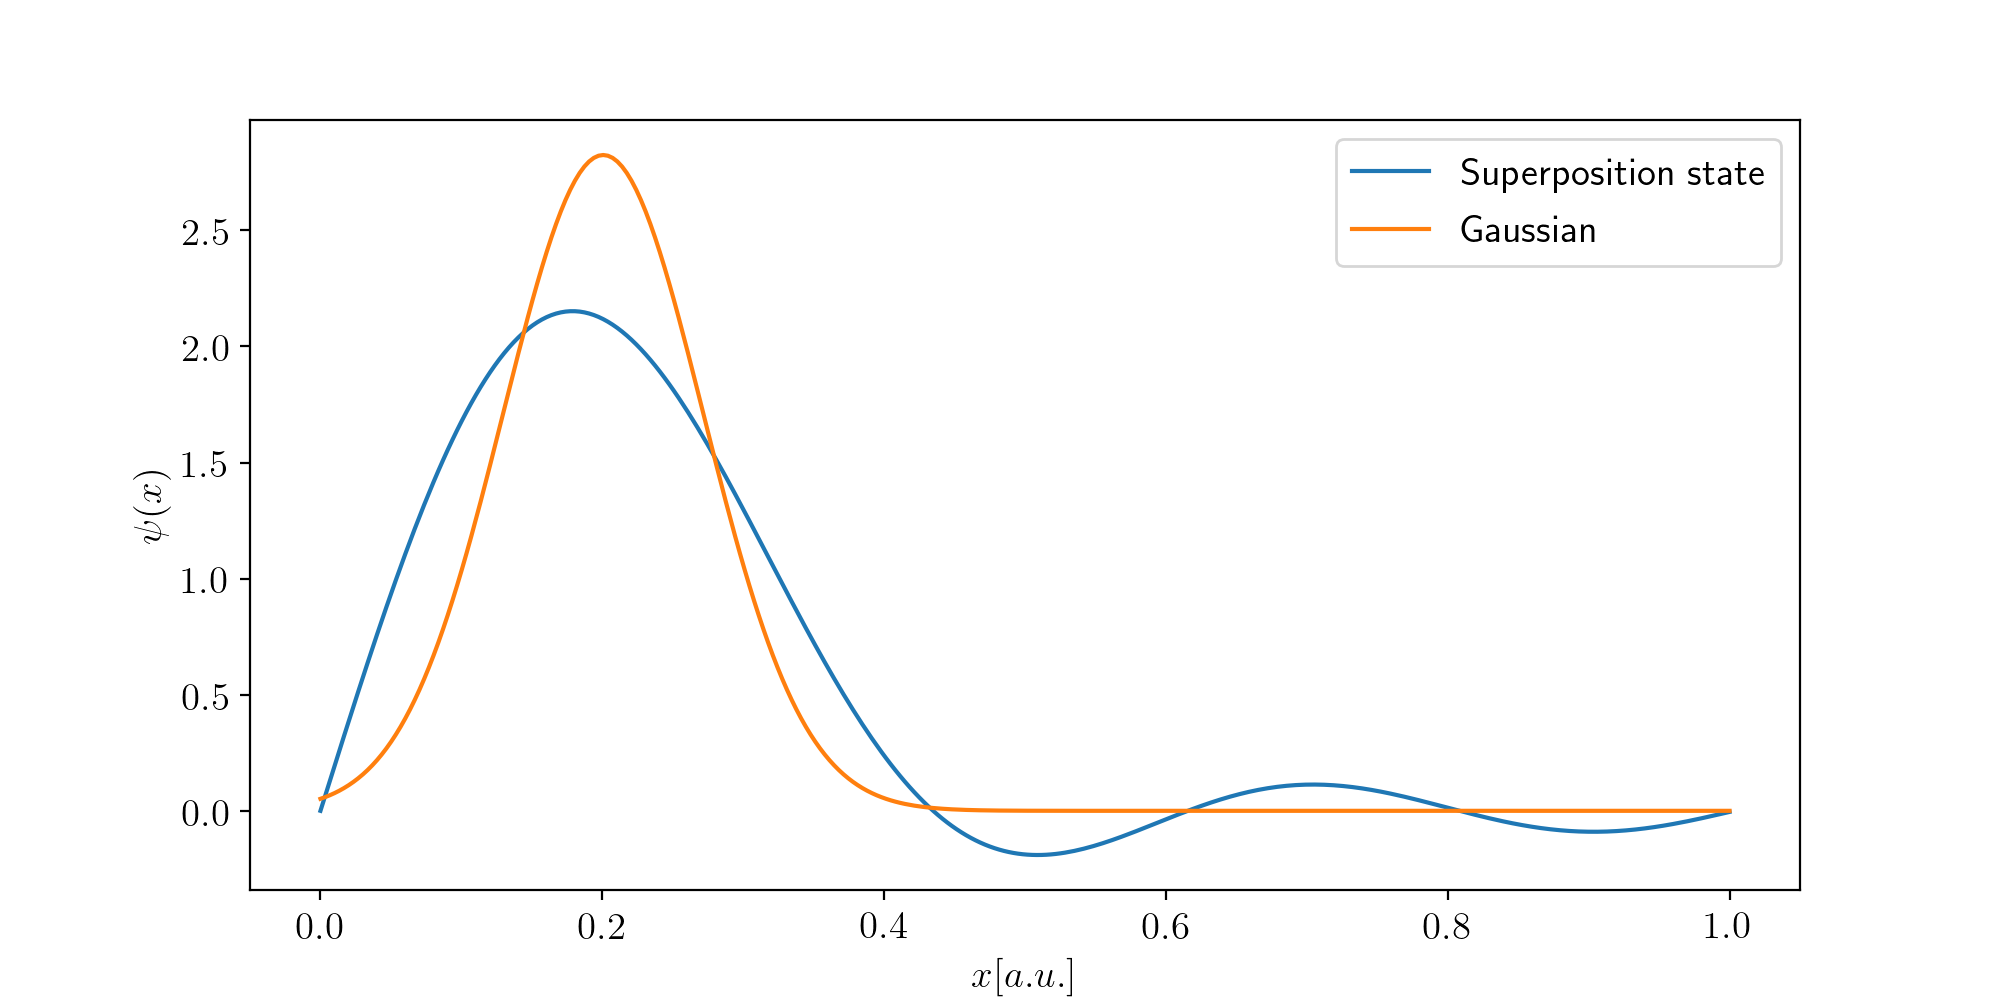

In [22]:
# superposition state
psi_0 = 0
for i in range(0, num):
    psi_0 = psi_0 + cn[i] * eigs[i]

# some basic plotting magic to make the plots look better
fig, ax = plt.subplots(1, figsize = (10, 5));
plt.rcParams.update({'font.size': 14})
ax.set_xlabel(r'$x [a.u.]$')
ax.set_ylabel(r'$\psi(x)$')
plt.plot(xs, psi_0,label = 'Superposition state')
plt.plot(xs, g,label = 'Gaussian')
ax.legend(loc = 'best')
plt.show()

## The energy eigenvalues 

In [8]:
energy = np.zeros(num)

for i in range(0, num):
    energy[i] = ((i + 1) * np.pi)**2 / (2 * L**2)

## Animation

In [9]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib)
    each time called, it will replot with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    
    #  defining how the wavefunction evolves with time, t
    obj = 0
    for i in range(0, num):
        obj += cn[i] * eigs[i] * np.exp(-1j * energy[i] * t) 
    
    # setting y data for the real, imaginary, total magnitude and probability distribution plots
    _prob = obj.real**2 + obj.imag**2
    
    real.set_ydata(obj.real)
    imag.set_ydata(obj.imag)
    prob.set_ydata(_prob)
    mag.set_ydata(np.sqrt(_prob))

    # setting data for mean position
    _mean = sum(_prob * xs) * step
    
    ax3.plot(_mean, t, 'k.', ms = 1)
    mean.set_ydata(0)
    mean.set_xdata(_mean)
    
    # dynamically set the y axis of 3rd plot
    if t > 1.5:
        ax3.set_ylim(t - 1.5, t + 0.5)

<IPython.core.display.Javascript object>


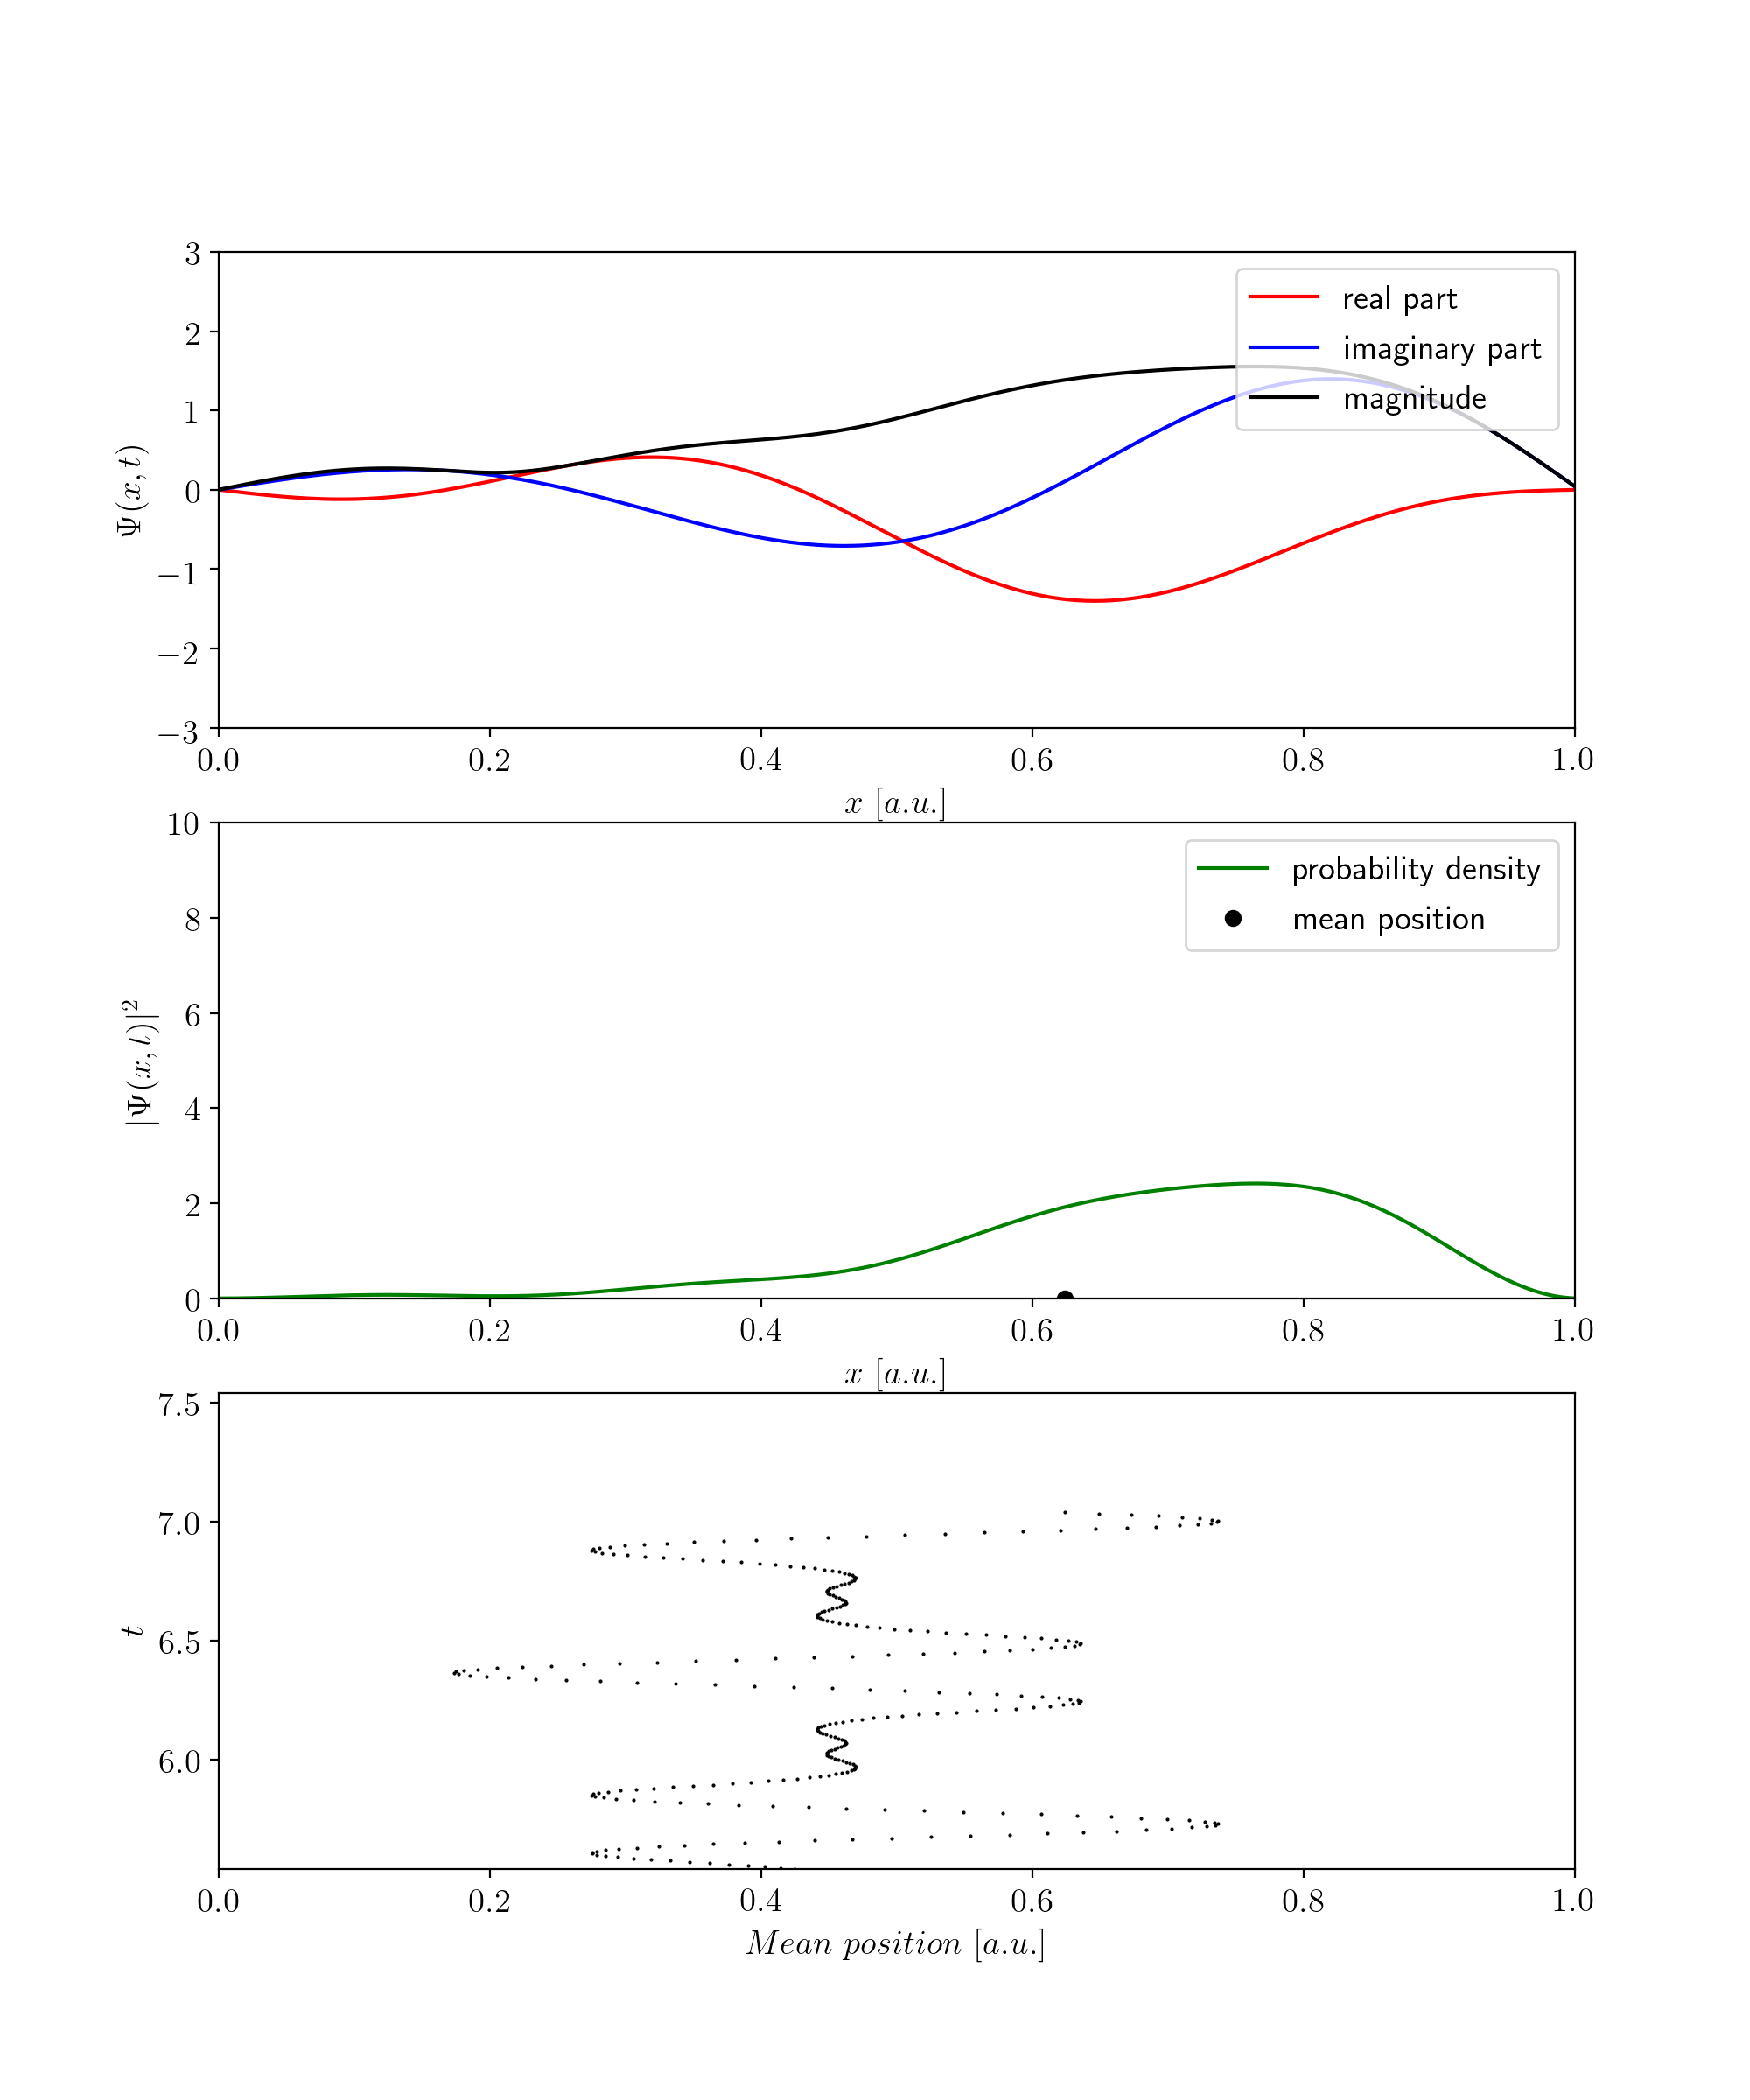

In [24]:
%matplotlib notebook

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 12))

# creating our line objects for the plots (initialise the plots)
real, = ax1.plot(xs, eigs[1], '-r', label = 'real part') 
imag, = ax1.plot(xs, eigs[1], '-b', label = 'imaginary part') 
mag, = ax1.plot(xs, eigs[1], '-k', label = 'magnitude')
prob, = ax2.plot(xs, eigs[1], '-g', label = 'probability density')
mean, = ax2.plot(xs, eigs[1], 'ko', label = 'mean position')



def init():
    """
    initialize the figure object 
    
    Returns:
        wave_real : a line object that will form the first frame of the plot
        
        wave_imag : see above
        
        prob : see above
        
        wave_mag : see above
    
    """
    ax1.set_xlim(0, 1)
    ax1.set_ylim(-3, 3)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 10)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 2)
    
    plt.rcParams.update({'font.size': 14})
    ax1.set_xlabel(r'$x \ [a.u.]$')
    ax1.set_ylabel(r'$\Psi(x, t)$')
    ax2.set_xlabel(r'$x \ [a.u.]$')
    ax2.set_ylabel(r'$|\Psi(x, t)|^2$')
    ax3.set_xlabel(r'$Mean \ position \ [a.u.]$')
    ax3.set_ylabel(r'$t$')
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')

    
    return real, imag, mag, prob, mean

# the FuncAnimation function iterates through our animate function using the steps array
dt = 0.005 # stepsize of the widths 
ts = np.arange(0, 2000, dt)
ani = FuncAnimation(fig, animate, ts, init_func=init, interval=25, blit=True) 
    # animation object, give it the figure object, the animate function, the input for the animate function,
    # the intialising function, interval - amount of time between each frame, blitting reduces time

plt.show()